In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_id2 = '1IhCUZRzL8RkBqlRPpY5boBzukPkjOIqM'
destination2 = 'Diagnostics.xlsx'

!gdown --id {file_id2} --output {destination2}

In [ ]:
# Se realiza la carga de archivos al entorno
file_id = '1tGXh5G3DEOshn6DA28nioFCQv7ZX0e0l'
destination = 'ECGDataDenoised.zip'

!gdown --id {file_id} --output {destination}

In [ ]:
datos = pd.read_excel('Diagnostics.xlsx')
# Observación preliminar de las variables y estructura del dataset
datos.describe()

In [ ]:
# Se estraen los archivos en una carpeta dentro del entorno
import zipfile
zip_path = "ECGDataDenoised.zip"
extract_to = "ecg_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
# Check current working directory and file listing
!pwd
!ls -l

In [ ]:
# Re-descargar el archivo
file_id = '1tGXh5G3DEOshn6DA28nioFCQv7ZX0e0l'
destination = 'ECGDataDenoised.zip'
!gdown --id {file_id} --output {destination}

In [ ]:
df = pd.read_excel('Diagnostics.xlsx')

df

In [ ]:
df.describe()

In [ ]:
df.groupby(by=["Rhythm"]).describe()

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(df['Rhythm'], bins=10, kde=False, color='black')

plt.ylabel('Cantidad de casos')
plt.xlabel('Arritmia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

La arritmia más prevelante es SB

In [ ]:
df['Gender'].value_counts()

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='Rhythm', hue='Gender', palette='rocket')
plt.ylabel('Cantidad de casos')
plt.xlabel('Arritmia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='Rhythm', y='PatientAge', palette='rocket')
plt.ylabel('Rango de edad')
plt.xlabel('Arritmia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='Rhythm', y='PatientAge', palette='rocket', showfliers=False)
plt.ylabel('Rango de edad')
plt.xlabel('Arritmia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Se descartan las edades atípicas: Las que se alejan de la media mas que la desviación estandar

In [ ]:
df['PatientAge'].describe()
sns.histplot(df['PatientAge'], bins=20, kde=True)

In [ ]:
df_filtrado = df[(df['PatientAge'] >= 41) & (df['PatientAge'] <= 87)]
df_filtrado.describe()
sns.histplot(df_filtrado['PatientAge'], bins=20, kde=True)

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(df_filtrado['Rhythm'], bins=10, kde=False, color='black')
plt.ylabel('Cantidad de casos')
plt.xlabel('Arritmia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Se descartaría SA, AT, AVNRT, SAAWR, AVRT

In [ ]:
###discard = ['SA', 'AT', 'AVNRT', 'SAAWR', 'AVRT']
 #for rhythm in discard:
  #df_filtrado.drop(df_filtrado[df_filtrado['Rhythm']].index)


In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_filtrado, x='Rhythm', y='PatientAge', palette='rocket')
plt.ylabel('Rango de edad')
plt.xlabel('Arritmia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Coger las arritmias que tengan más de 400 casos.

 # Análisis 2: Selección herramienta de análisis
 Escogemos 'AFIB' (Fibrilación ) y 'ST' (Taquicardia sinusal)

In [ ]:
!pip install neurokit2
!pip install py-ecg-detectors

In [ ]:
import neurokit2 as nk
from ecgdetectors import Detectors

In [ ]:
AFIB_urls = df[(df["Rhythm"] == 'AFIB')]['FileName']
ST_urls = df[(df["Rhythm"] == 'ST')]['FileName']

print(AFIB_urls)
print(ST_urls)

In [ ]:
signal = pd.read_csv(f'ecg_data/ECGDataDenoised/{AFIB_urls[0]}.csv', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
signal

In [ ]:
import os



AFIB_urls = df[(df["Rhythm"] == 'AFIB')]['FileName']
ST_urls = df[(df["Rhythm"] == 'ST')]['FileName']

# Check if the file exists before trying to read it
file_path = f'ECGDataDenoised/{AFIB_urls.iloc[0]}.csv'  # Use iloc to access the first element
if os.path.exists(file_path):
    signal = pd.read_csv(file_path, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
    print(signal)
else:
    print(f"File not found: {file_path}")
    # Check if the file exists in the 'ecg_data' directory instead
    file_path = f'ecg_data/{AFIB_urls.iloc[0]}.csv'
    if os.path.exists(file_path):
        signal = pd.read_csv(file_path, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        print(signal)
    else:
        print(f"File not found in either directory: {AFIB_urls.iloc[0]}.csv")

# ... (rest of the code) ...

In [ ]:
fig, axes = plt.subplots(nrows=20, ncols=1, figsize=(10, 100))  # Create a grid of subplots
i = 0
fs = 500
for url in AFIB_urls[:20]:
    signal = pd.read_csv(f'ecg_data/ECGDataDenoised/{url}.csv', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
    axes[i].plot(signal['I'].values)
    axes[i].set_title(f"Señal {i+1}")
    i += 1

plt.tight_layout()
plt.show()

1. Detectar los picos R utilizando la función de la librería NeuroKit.

In [ ]:
random_urls = np.random.choice(ST_urls, size=20, replace=False)
for url in random_urls:
    signal_ekg = pd.read_csv(f'ecg_data/ECGDataDenoised/{url}.csv', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
    signals, rpeaks = nk.ecg_peaks(signal_ekg['II'], sampling_rate=fs, correct_artifacts=False, show=True)

In [ ]:



def detect_rpeaks(signal, fs):
    detectors = Detectors(fs)
    rpeaks_detector = detectors.pan_tompkins_detector(signal)
    signals_nk, rpeaks_nk = nk.ecg_peaks(signal, sampling_rate=fs, correct_artifacts=False)
    return rpeaks_detector, rpeaks_nk


peak_counts_detector = []
peak_counts_nk = []
file_names = []



random_urls = np.random.choice(ST_urls, size=10, replace=False) # Reduced the number for faster execution

for url in random_urls:
    file_path = f'ecg_data/ECGDataDenoised/{url}.csv'
    if os.path.exists(file_path):
        signal_ekg = pd.read_csv(file_path, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

        rpeaks_detector, rpeaks_nk = detect_rpeaks(signal_ekg['II'], fs=500)

        peak_counts_detector.append(len(rpeaks_detector))
        peak_counts_nk.append(len(rpeaks_nk['ECG_R_Peaks']))
        file_names.append(url)
    else:
        print(f"File not found: {file_path}")


plt.figure(figsize=(12, 6))
x_test = np.arange(1, len(file_names) +1)
plt.plot(x_test, peak_counts_detector, label='ECG Detectors', marker='o')
plt.plot(x_test, peak_counts_nk, label='NeuroKit2', marker='x')
plt.xlabel('Señales')
plt.ylabel('Numero de picos detectados')
plt.title('Comparacion de los metodos')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# Análisis 3. : Variabilidad de la frecuencia cardíaca (HRV) y otros índices ECG

In [ ]:
!pip install hrv-analysis

In [ ]:

discard_rhythms = ['SA', 'AT', 'AVNRT', 'SAAWR', 'AVRT']
min_cases = 400

rhythm_counts = df_filtrado['Rhythm'].value_counts()


filtered_rhythms = [rhythm for rhythm, count in rhythm_counts.items() if rhythm not in discard_rhythms and count >= min_cases]


df_final = df_filtrado[df_filtrado['Rhythm'].isin(filtered_rhythms)]


df_final


In [ ]:
df_final.groupby("Rhythm")["FileName"].count()

In [ ]:
from hrvanalysis import get_time_domain_features, remove_outliers
from tqdm import tqdm

In [ ]:

ruta_ecg = "ecg_data/ECGDataDenoised"
detector_ecg = Detectors(sampling_frequency=500)

def encontrar_r_peaks(ecg_signal):
    return detector_ecg.hamilton_detector(ecg_signal.to_numpy())

def obtener_nn_intervals(r_locs, fs=500):
    return np.diff(r_locs) * (1000 / fs)

# Listas para guardar resultados y señales descartadas
resultados_hrv = []
ecg_no_validos = []

# Procesamiento de los archivos
for idx, registro in tqdm(df_final.iterrows(), total=len(df_final), desc="Analizando registros ECG"):
    nombre_archivo = f"{registro['FileName']}.csv"
    ruta_archivo = os.path.join(ruta_ecg, nombre_archivo)

    if not os.path.isfile(ruta_archivo):
        print(f"No se encontró el archivo: {nombre_archivo}")
        continue

    try:
        datos_ecg = pd.read_csv(ruta_archivo, header=None)
        ecg_signal = datos_ecg.iloc[:, 1]
        r_peaks = encontrar_r_peaks(ecg_signal)
        intervalos_nn = obtener_nn_intervals(r_peaks)

        if len(intervalos_nn) > 2:
            caracteristicas = get_time_domain_features(intervalos_nn.tolist())
            caracteristicas["Cantidad_R_Peaks"] = len(r_peaks)
            caracteristicas["Archivo"] = registro["FileName"]
            caracteristicas["Ritmo"] = registro["Rhythm"]
            resultados_hrv.append(caracteristicas)
        else:
            ecg_no_validos.append((ecg_signal, registro["FileName"]))
    except Exception as error:
        print(f"Fallo al procesar {nombre_archivo}: {error}")

# Guardar resultados en un CSV
df_resultados_hrv = pd.DataFrame(resultados_hrv)
df_resultados_hrv.to_csv("Resultados_hrv.csv", index=False)


In [ ]:
df_resultados_hrv.head(10)

In [ ]:

from hrvanalysis import get_frequency_domain_features

# Assuming df_resultados_hrv is already created from the previous code

# Function to get frequency domain features, handling potential errors
def get_frequency_features(nn_intervals):
    try:
        return get_frequency_domain_features(nn_intervals)
    except Exception as e:
        print(f"Error calculating frequency domain features: {e}")
        return None

# Add frequency domain features to the DataFrame
frequency_features_list = []
for index, row in df_resultados_hrv.iterrows():
    nn_intervals = intervalos_nn
    if isinstance(nn_intervals, list):
      frequency_features = get_frequency_features(nn_intervals)
      if frequency_features:
        frequency_features_list.append(frequency_features)
      else:
        frequency_features_list.append({}) #Append an empty dictionary if there's an error.
    else:
      frequency_features_list.append({}) #Append empty dict if nn50 isn't a list.

# Create DataFrame from the list
df_frequency_features = pd.DataFrame(frequency_features_list)

# Concatenate the two DataFrames
df_combined = pd.concat([df_resultados_hrv, df_frequency_features], axis=1)

# Display the combined DataFrame
df_frequency_features = df_combined.drop(columns=[
'mean_nni', 'sdnn', 'sdsd', 'nni_50', 'pnni_50', 'nni_20', 'pnni_20',
       'rmssd', 'median_nni', 'range_nni', 'cvsd', 'cvnni', 'mean_hr',
       'max_hr', 'min_hr', 'std_hr', 'Cantidad_R_Peaks', 'Archivo', 'Ritmo',
       'Mean_RR', 'HR'
])

df_frequency_features = df_frequency_features.dropna()
df_frequency_features.head(10)


# Análisis 4: Comparación de características entre grupos

In [ ]:
def graficar_boxplots(df, columnas_hrv):
    """
    Visualiza boxplots de varias métricas HRV agrupadas por tipo de ritmo.

    Parámetros:
    - df: DataFrame que contiene los datos HRV y la columna 'Ritmo'.
    - columnas_hrv: Lista con los nombres de las métricas a graficar.
    """
    total_graficas = len(columnas_hrv)
    columnas = 3
    filas = -(-total_graficas // columnas)  # Redondeo hacia arriba

    fig, ejes = plt.subplots(filas, columnas, figsize=(18, 5 * filas))
    ejes = ejes.flatten()

    for i, columna in enumerate(columnas_hrv):
        sns.boxplot(
            data=df,
            x="Ritmo",    # <-- aquí corregido
            y=columna,
            palette="pastel",
            ax=ejes[i]
        )
        ejes[i].set_title(f"Boxplot de {columna}", fontsize=13)
        ejes[i].set_xlabel("")
        ejes[i].set_ylabel(columna, fontsize=11)
        ejes[i].tick_params(axis='x', rotation=30)

    # Ocultar ejes vacíos
    for k in range(i + 1, len(ejes)):
        fig.delaxes(ejes[k])

    plt.tight_layout()
    plt.show()

variables_hrv = [
    "mean_nni", "sdnn", "sdsd", "nni_50", "pnni_50",
    "nni_20", "pnni_20", "rmssd", "median_nni",
    "range_nni", "cvsd", "cvnni", "mean_hr", "max_hr", "std_hr"
]

graficar_boxplots(df_resultados_hrv, variables_hrv)


In [ ]:
def filtrar_valores_extremos(df_analisis, columnas_metricas, grupo_columna='Ritmo', umbral_retenido=0.95):
    """
    Filtra outliers por grupo utilizando el método del IQR, asegurando mantener un porcentaje mínimo de datos.

    Args:
    - df_analisis: DataFrame que contiene los datos a procesar.
    - columnas_metricas: Lista de nombres de columnas numéricas a evaluar.
    - grupo_columna: Columna utilizada para agrupar los datos (por defecto: 'Ritmo').
    - umbral_retenido: Proporción mínima de datos que deben permanecer tras eliminar outliers (por defecto: 0.95).

    Returns:
    - DataFrame sin outliers, respetando el umbral de datos retenidos.
    """
    df_limpio = df_analisis.copy()

    for columna in columnas_metricas:
        total_datos = len(df_limpio)
        outliers_indices = []

        for valor_grupo in df_limpio[grupo_columna].unique():
            subset = df_limpio[df_limpio[grupo_columna] == valor_grupo][columna]

            # Cálculo de los cuartiles y rango intercuartílico
            q1 = subset.quantile(0.25)
            q3 = subset.quantile(0.75)
            rango_iqr = q3 - q1

            # Definición de límites de valores aceptables, buscando conservar
            # al menos 2,7 desviaciones estandar
            limite_inferior = q1 - (1.5 * rango_iqr)
            limite_superior = q3 + (1.5 * rango_iqr)

            # Identificación de índices considerados outliers
            indices_detectados = subset[(subset < limite_inferior) | (subset > limite_superior)].index.tolist()
            outliers_indices.extend(indices_detectados)

        # Eliminación de duplicados de índices
        outliers_indices = list(set(outliers_indices))

        # Verificación del umbral antes de eliminar
        datos_finales = total_datos - len(outliers_indices)
        if datos_finales / total_datos >= umbral_retenido:
            df_limpio = df_limpio.drop(index=outliers_indices)
        else:
            print(f"Advertencia: No se eliminaron outliers en '{columna}' para conservar al menos el {int(umbral_retenido * 100)}% de los datos.")

    return df_limpio

In [ ]:
df_hrv_filtrado = filtrar_valores_extremos(df_resultados_hrv, variables_hrv)

In [ ]:
graficar_boxplots(df_hrv_filtrado, variables_hrv)

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

alpha = 0.05

In [ ]:
# Prueba de normalidad
for metrica in variables_hrv:
  print('\n')
  print(f'{metrica}'.center(60, '-'))
  for arritmia in df_hrv_filtrado['Ritmo'].unique():
    stat, p = shapiro(df_hrv_filtrado[df_hrv_filtrado['Ritmo'] == arritmia][metrica])
    if p < alpha:
      normalidad = 'no normal'
    else:
      normalidad = 'normal'

    print(f'\n{arritmia}: {p} -> {normalidad}')


In [ ]:
# Prueba de homocedasticidad
print('HOMECEDASTICIDAD AFIB VS ST')
for metrica in variables_hrv:
  print('\n')
  print(f'{metrica}'.center(60, '-'))
  stat, p = levene(df_hrv_filtrado[df_hrv_filtrado['Ritmo'] == 'AFIB'][metrica], df_hrv_filtrado[df_hrv_filtrado['Ritmo'] == 'ST'][metrica])
  if p < alpha:
    homocedasticidad = 'no homocedastico'
  else:
    homocedasticidad = 'homocedastico'

  print(f'\n{p} -> {homocedasticidad}')



In [ ]:
print('PRUEBA U DE MANN-WHITNEY (AFIB VS ST)')
u_mann_whitney_values = {}
for metrica in variables_hrv:
  u_stat, p_value = mannwhitneyu(df_hrv_filtrado[df_hrv_filtrado["Ritmo"] == "AFIB"][metrica], df_hrv_filtrado[df_hrv_filtrado["Ritmo"] == "ST"][metrica])
  if p_value < alpha:
    conclusion = "Rechazar H0, Hay diferencia estadística entre las medianas"
  else:
    conclusion = "No rechazar H0, No hay diferencia estadística entre las medianas"
  print(f"\nPrueba U de Mann-Whitney de {metrica}: U = {u_stat}, p-value = {p_value}")
  u_mann_whitney_values[metrica] = u_stat
  print(conclusion)

df_u = pd.DataFrame.from_dict(u_mann_whitney_values, orient='index', columns=['U_value'])


In [ ]:
df_u['U_normalized'] = (df_u['U_value'] - df_u['U_value'].min()) / (df_u['U_value'].max() - df_u['U_value'].min())
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    df_u[['U_normalized']],
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    cbar_kws={'label': 'Valor U de Mann-Whitney'}
)
plt.title("Valor del estadístico U de Mann-Whitney por métrica (AFib vs. ST)", pad=20)
plt.xlabel("Estadístico U")
plt.ylabel("Métricas de ritmo cardíaco")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calcular r = Z / sqrt(N) (aproximación para tamaño del efecto) r de Wilcoxon (tamaño del efecto para pruebas no paramétricas basado en U)
total_samples = len(df_hrv_filtrado[df_hrv_filtrado["Ritmo"] == "AFIB"][metrica]) + len(df_hrv_filtrado[df_hrv_filtrado["Ritmo"] == "ST"][metrica])  # Reemplaza con tus tamaños reales
df_u['r_effect'] = (df_u['U_value'] / (len(df_hrv_filtrado[df_hrv_filtrado["Ritmo"] == "AFIB"][metrica]) * len(df_hrv_filtrado[df_hrv_filtrado["Ritmo"] == "ST"][metrica]))) - 0.5  # Ajuste para r

plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_u[['r_effect']], annot=True, cmap="coolwarm", center=0)
ax.set_title('Tamaño del efecto (r) para cada métrica de ritmo cardíaco')
ax.set_xlabel('Tamaño del efecto (r)')
ax.set_ylabel('Métricas de HRV')

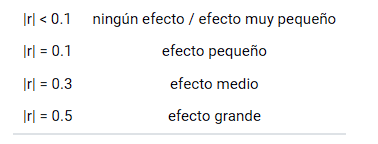